In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
uba=pd.read_csv('UberDataset.csv')
uba.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [4]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(uba):
    # Replace missing values with the most common value of each column in: 'END_DATE'
    uba = uba.fillna({'END_DATE': uba['END_DATE'].mode()[0]})
    # Replace missing values with "none" in column: 'END_DATE'
    uba = uba.fillna({'END_DATE': "none"})
    # Replace all instances of "" with "" in column: 'PURPOSE'
    uba['PURPOSE'] = uba['PURPOSE'].str.replace("NaN", "None", case=False, regex=False)
    # Drop rows with missing data in column: 'START'
    uba = uba.dropna(subset=['START'])
    # Replace all instances of "NaN" with "None" in column: 'PURPOSE'
    uba['PURPOSE'] = uba['PURPOSE'].str.replace("NaN", "None", case=False, regex=True)
    # Replace missing values with "Private" in column: 'PURPOSE'
    uba = uba.fillna({'PURPOSE': "Private"})
    return uba

uba_clean = clean_data(uba.copy())
uba_clean.head()


,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,Private
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [5]:
largest_distance=uba['MILES'].mode()[0]
print('The largest Distance Travelled is:',largest_distance)

The largest Distance Travelled is: 9.9


In [6]:
largest_distance=uba['PURPOSE'].mode()[0]
print('The largest Distance Travelled is:',largest_distance)

The largest Distance Travelled is: Meeting


In [7]:
largest_distance=uba['CATEGORY'].mode()[0]
print('The category with the most visit is:',largest_distance)

The category with the most visit is: Business


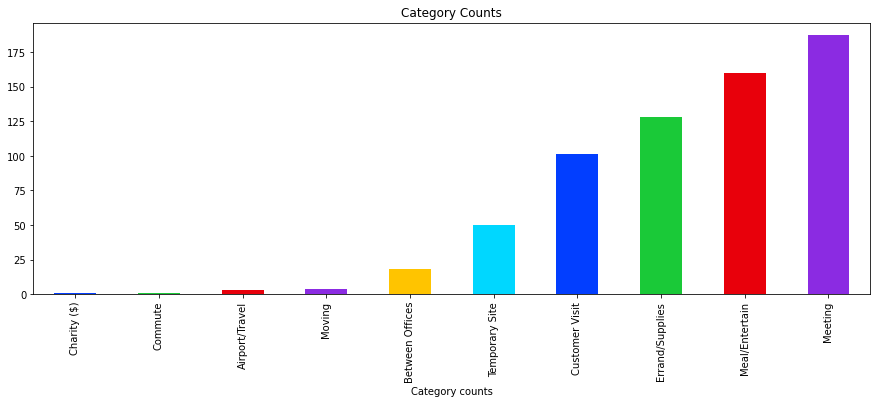

In [52]:
uba['PURPOSE'].value_counts().sort_values(ascending=True).plot(kind='bar',color=sns.color_palette('bright6'),figsize=(15,5))
plt.xlabel('Category counts')
plt.title('Category Counts')
plt.show()

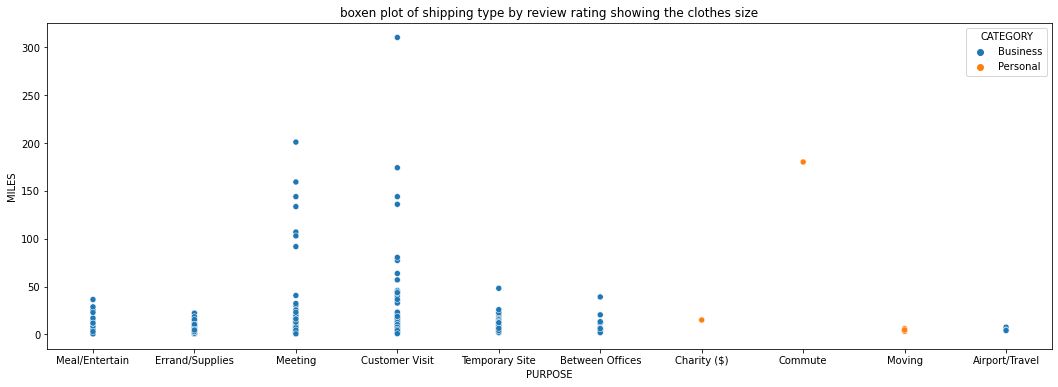

In [51]:
plt.figure(figsize=(18,6))
sns.scatterplot(x='PURPOSE',y='MILES',data=uba,hue='CATEGORY')
#plt.savefig("Images/Boxen plot.png")
plt.title("boxen plot of shipping type by review rating showing the clothes size")
plt.show()